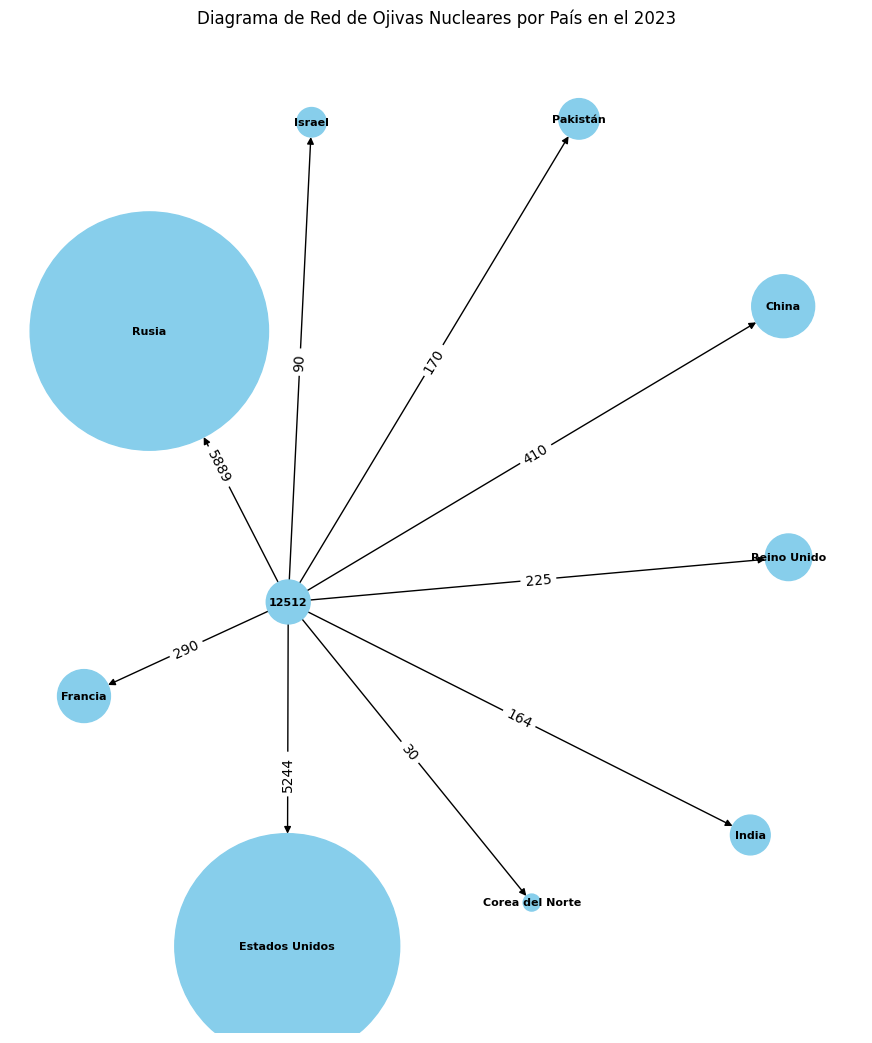

In [15]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

data = pd.DataFrame({
    'País': ["Rusia", "Estados Unidos", "China", "Francia", "Reino Unido", "Pakistán", "India","Corea del Norte","Israel"],
    'Ojivas_nucleares': [5889, 5244, 410, 290, 225, 170, 164, 30, 90],
    'Año_datos': [2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023]
})


total_ojivas = data['Ojivas_nucleares'].sum()
G = nx.DiGraph()

# Agregar el nodo central con el total de ojivas nucleares
G.add_node(total_ojivas)

# Agregar nodos para cada país y conectarlos al nodo central
for _, row in data.iterrows():
    G.add_node(row['País'], ojivas=row['Ojivas_nucleares'])
    G.add_edge(total_ojivas, row['País'], weight=row['Ojivas_nucleares'])

# Dibujar el grafo
pos = nx.spring_layout(G)
node_sizes = [G.nodes[n]['ojivas'] * 5 if n != total_ojivas else 1000 for n in G.nodes()]
fig, ax = plt.subplots(figsize=(11, 13))  # Ajustar el tamaño de la imagen
nx.draw(G, pos, ax=ax, node_size=node_sizes, with_labels=True, font_size=8, node_color='skyblue', font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Diagrama de Red de Ojivas Nucleares por País en el 2023")
plt.show()

